adding test data in code

Confusion Matrix:
[[1529   78]
 [ 198  195]]


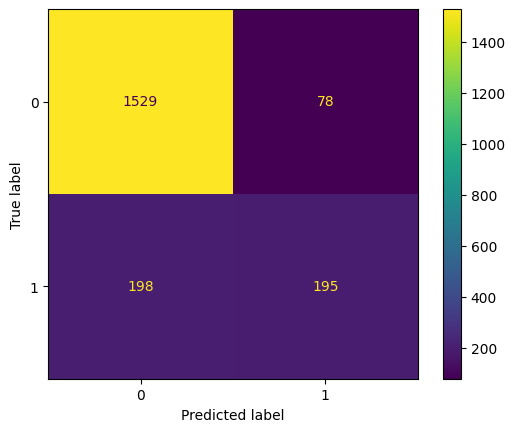

Accuracy on test set: 0.86


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Step 2: Distinguish the features and target
X = df.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y = df['Exited']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and build the model
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
con = confusion_matrix(y_test, y_pred)
print(con)
cm = ConfusionMatrixDisplay(con)
cm.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Step 7: Create custom data
# Example custom data, matching the feature set (note: values are hypothetical)
custom_data = pd.DataFrame({
    'CreditScore': [650, 700], 
    'Geography_Germany': [1, 0], 
    'Geography_Spain': [0, 1], 
    'Gender_Male': [1, 0], 
    'Age': [35, 40],
    'Tenure': [5, 3],
    'Balance': [60000, 0],
    'NumOfProducts': [1, 2],
    'HasCrCard': [1, 0],
    'IsActiveMember': [1, 1],
    'EstimatedSalary': [50000, 70000]
})

# Normalize the custom data using the same scaler
custom_data = scaler.transform(custom_data)

# Step 8: Predict using custom data
custom_predictions = model.predict(custom_data)
print("Predictions for custom data:", custom_predictions)

# Step 9: Optional - Show the probability of each class for better insights
custom_probabilities = model.predict_proba(custom_data)
print("Prediction probabilities for custom data:")
print(custom_probabilities)


adding test data via csv manuallly

In [ ]:
# Step 1: Reload the dataset with custom data added
df = pd.read_csv("Churn_Modelling.csv")

# Step 2: Distinguish the features and target (make sure 'Exited' column has some value for custom data rows)
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize and build the model
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test)

# Print confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

print("Confusion Matrix:")
con = confusion_matrix(y_test, y_pred)
print(con)
cm = ConfusionMatrixDisplay(con)
cm.plot()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Step 7: Filter for custom data only (optional, assuming you've marked these with a placeholder in 'Exited' column)
# Here, we assume you've marked the custom data with a unique identifier or manually select them
custom_data = df.iloc[-2:]  # Assuming last 2 rows are custom data

# Drop target variable and apply scaler transformation
custom_data_X = custom_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
custom_data_X = pd.get_dummies(custom_data_X, drop_first=True)
custom_data_X = scaler.transform(custom_data_X)

# Step 8: Predict using custom data
custom_predictions = model.predict(custom_data_X)
print("Predictions for custom data:", custom_predictions)

# Optional - Show the probability of each class for better insights
custom_probabilities = model.predict_proba(custom_data_X)
print("Prediction probabilities for custom data:")
print(custom_probabilities)
